## Problem 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
s1 = pd.Series(index=np.arange(0,51,2))
s1[:] = s1.index**2 - 1
s1[np.array([i % 3 == 0 for i in s1.index])] = 0
s1

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64

## Problem 2

In [3]:
import matplotlib.pyplot as plt

In [4]:
def stock(p, d = 100):
    '''
    simulate a random walk of a stock
    
    inputs:
        p: Bernoulli distribution parameter
        d: initial investment
    
    outputs:
        cumulative value    
    '''
    
    # set date range
    date = pd.date_range("1/1/2000", "12/31/2000", freq = 'D')
    
    # draw a random walk of price changes
    draw = np.random.binomial(size = date.size, n = 1, p = p)
    change = pd.Series(draw, index = date) * 2 - 1
    
    # set initial investment
    change.values[0] = d
    
    # compute cumulative sum
    price = change.cumsum()
    
    # set any negative values to 0
    price[np.array(price.values<0)] = 0 
    
    # plot the series
    price.plot()
    plt.show()
    return 

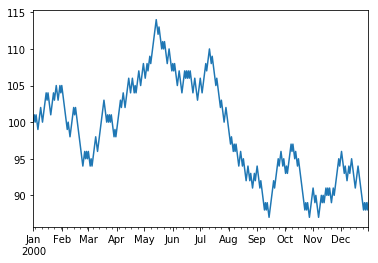

In [5]:
stock(0.5)

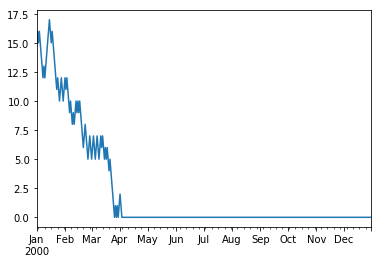

In [6]:
stock(0.5,15)

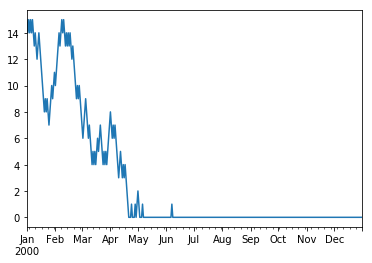

In [7]:
stock(0.4,15)

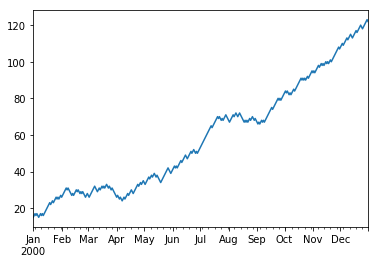

In [8]:
stock(0.6,15)

## Problem 3

In [9]:
# build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [10]:
studentInfo[(studentInfo['Age']>19)&(studentInfo['Sex']=='M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


## Problem 4

In [11]:
pd.merge(studentInfo, otherInfo, on='ID')[studentInfo['Sex'] == 'M'][['ID', 'Age', 'GPA']]

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4
